In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Extracting Input Features and Output features(Targets)

In [3]:
# To get the first Columns aka the input variable
X=data.iloc[:,0:1]
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [4]:
X.values

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [5]:
y=data.iloc[:,1:2]
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [6]:
y.values

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

### Cross Validation on data

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, train_size=0.8) # It will work randomly to remove bias

In [9]:
X_train.shape

(24, 1)

In [10]:
y_train.shape

(24, 1)

In [11]:
X_test.shape

(6, 1)

In [12]:
y_test.shape

(6, 1)

In [13]:
regressor=LinearRegression() # Linear Regression algorithm

In [14]:
regressor.fit(X_train,y_train) # To train the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
X_test

,YearsExperience
1,1.3
3,2.0
19,6.0
26,9.5
17,5.3
6,3.0


In [16]:
y_test

,Salary
1,46205.0
3,43525.0
19,93940.0
26,116969.0
17,83088.0
6,60150.0


In [17]:
regressor.predict(X_test[0].reshape(1,1))

KeyError: 0

In [ ]:
regressor.predict(np.array(12).reshape(1,1))

In [18]:
def salary_predictor(exp):
    print(regressor.predict(np.array(exp).reshape(1,1))[0])

In [19]:
salary_predictor(12)

[139083.12579169]


In [20]:
exp=data['YearsExperience'].values
exp

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [21]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


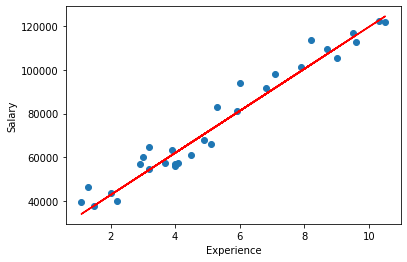

In [22]:
plt.scatter(exp,y)
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

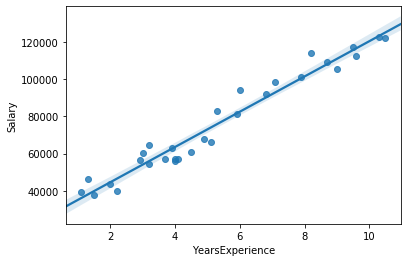

In [23]:
sns.regplot('YearsExperience','Salary',data=data)
plt.show()

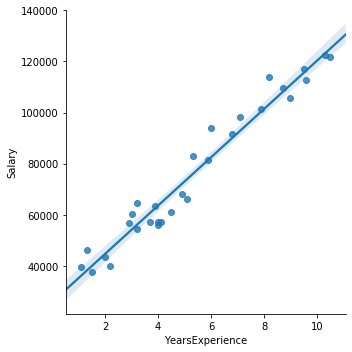

In [24]:
sns.lmplot('YearsExperience','Salary',data=data)
plt.show()

In [25]:
m=regressor.coef_[0]
m

array([9645.35657675])

In [26]:
c=regressor.intercept_[0]
c

23338.846870647

In [27]:
m*500 + c

array([4846017.13524734])

In [28]:
from sklearn.metrics import r2_score

In [29]:
y_pred=regressor.predict(X_test)
y_pred

array([[ 35877.81042043],
       [ 42629.56002415],
       [ 81210.98633117],
       [114969.7343498 ],
       [ 74459.23672744],
       [ 52274.91660091]])

In [30]:
r2_score(y_test,y_pred)

0.902847113875314

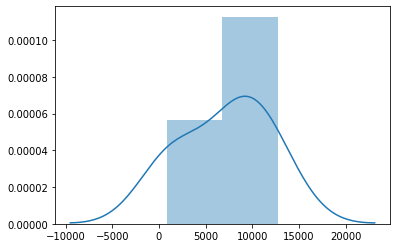

In [34]:
sns.distplot(y_test-y_pred)
plt.show()